In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/movies_metadata.csv', low_memory=False)

In [3]:
df = df[['title', 'genres', 'release_date', 'runtime', 'vote_average', 'vote_count']]
df.head()

,title,genres,release_date,runtime,vote_average,vote_count
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995-10-30,81.0,7.7,5415.0
1,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995-12-15,104.0,6.9,2413.0
2,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1995-12-22,101.0,6.5,92.0
3,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995-12-22,127.0,6.1,34.0
4,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",1995-02-10,106.0,5.7,173.0


In [4]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

<AxesSubplot:>

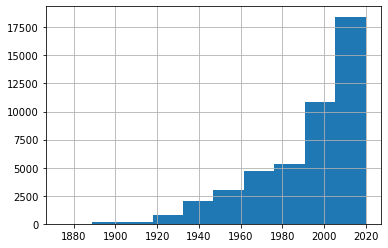

In [5]:
df['year'] = df['release_date'].dt.year
#df['year'] = df['year'].fillna(0)
df['year'].hist()

In [6]:
df = df.drop('release_date', axis=1)
df

,title,genres,runtime,vote_average,vote_count,year
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",81.0,7.7,5415.0,1995.0
1,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",104.0,6.9,2413.0,1995.0
2,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",101.0,6.5,92.0,1995.0
3,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",127.0,6.1,34.0,1995.0
4,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",106.0,5.7,173.0,1995.0
...,...,...,...,...,...,...
45461,Subdue,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",90.0,4.0,1.0,NaN
45462,Century of Birthing,"[{'id': 18, 'name': 'Drama'}]",360.0,9.0,3.0,2011.0
45463,Betrayal,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",90.0,3.8,6.0,2003.0
45464,Satan Triumphant,[],87.0,0.0,0.0,1917.0


In [7]:
import json

In [8]:
type(df['genres'][0])


str

In [9]:
df['genres'] = df['genres'].apply(eval)

In [10]:
df['genres'].isna().sum()

0

In [11]:
df['genres'] = df['genres'].apply(lambda x: [d['name'] for d in x])

In [12]:
df = df.explode('genres')

In [13]:
df.to_csv('data/metadata_clean.csv')